In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test)  = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [26]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


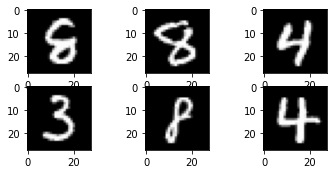

In [27]:
# importing matplot lib
import matplotlib.pyplot as plt
import numpy as np

# Plots 6 images, note subplot's arugments are nrows,ncols,index
# we set the color map to grey since our image dataset is grayscale
plt.subplot(331)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(332)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(333)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(334)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(335)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

# Display out plots
plt.show()

In [28]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [29]:
from keras.utils import np_utils

# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


In [30]:
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of Classes: 10


In [31]:
print( x_train.shape[1] , x_train.shape[2])

28 28


In [32]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [33]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import Adam

In [38]:

model = Sequential()

model.add(Conv2D(8,kernel_size = (3,3), activation = 'relu',
                input_shape = input_shape))

model.add(Conv2D(16, ( 3,3) ,  activation = 'relu' ))

model.add(Conv2D(32, ( 3,3) ,  activation = 'relu' ))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(16, activation='sigmoid'))
model.add(Dense(15, activation='sigmoid'))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = Adam(),
             metrics = ['accuracy']
            )

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 conv2d_17 (Conv2D)          (None, 24, 24, 16)        1168      
                                                                 
 conv2d_18 (Conv2D)          (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 3872)              0         
                                                                 
 dense_18 (Dense)            (None, 16)                61968     
                                                      

In [ ]:
batch_size = 32
epochs = 50

history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0465 - accuracy: 0.9874 - val_loss: 0.0491 - val_accuracy: 0.9865
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0284 - accuracy: 0.9922 - val_loss: 0.0476 - val_accuracy: 0.9854
Epoch 3/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0233 - accuracy: 0.9937 - val_loss: 0.0442 - val_accuracy: 0.9876
Epoch 4/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0189 - accuracy: 0.9952 - val_loss: 0.0416 - val_accuracy: 0.9881
Epoch 5/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0170 - accuracy: 0.9955 - val_loss: 0.0476 - val_accuracy: 0.9878
Epoch 6/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0151 - accuracy: 0.9961 - val_loss: 0.0461 - val_accuracy: 0.9871
Epoch 7/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0126 - accuracy: 0.9966 - val_loss: 0.0511 - val_ac